In [190]:
import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
plt.style.use('ggplot')

import pandas as pd #lets us handle data as dataframes

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

# Result Analysis
from sklearn.externals import joblib
from sklearn.metrics import recall_score, precision_score, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

from langdetect import detect
from langdetect import DetectorFactory

from tqdm import tqdm
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

# Some useful library
import os
from os.path import isfile

import pytextrank
import sys

import json
import gensim
import collections
import re, time , ntpath
import logging
import random
import glob
from pprint import pprint
from copy import deepcopy
from os import listdir
from collections import Counter
from pprint import pprint

from IPython.utils import io
from IPython.display import HTML, display
from ipywidgets import interact, Layout, HBox, VBox, Box
import ipywidgets as widgets
from IPython.display import clear_output

import spacy
from scipy.spatial.distance import jensenshannon
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_sci_lg
import string

# For Ploting
import seaborn as sns

# Word Embedding
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
from gensim.models import FastText
from gensim.models import doc2vec
from gensim.models.keyedvectors import KeyedVectors

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.spatial.distance import cdist

from sklearn.manifold import TSNE

from sklearn.decomposition import LatentDirichletAllocation

# File save
import pickle


# Natural Language Toolkit
import nltk
nltk.download('popular')

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer 
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

stop_words_nltk = set(stopwords.words('english')) 


/u/erdos/mamin17/.local/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /u/erdos/mamin17/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /u/erdos/mamin17/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /u/erdos/mamin17/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /u/erdos/mamin17/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    

In [191]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

%matplotlib inline

In [192]:
import os
from pathlib import Path
path = Path(os.getcwd())
print(path)

/esata/mamin17/bsbijoy2050/Thesis/notebook


In [193]:
def get_file_name(path):
    head, tail = ntpath.split(path)
    return tail or ntpath.basename(head)

In [195]:
# data - process

start = time.time()

OUTCOME = "/esata/mamin17/bsbijoy2050/Thesis/dataset/outcome"
label_dict = {}
with open(OUTCOME, "r") as label_file:
    lines = label_file.readlines()
    for line in lines:
        key, value = line.split(" ")
        label_dict[key] = str(value).replace("\r", "").replace("\r\n", "").replace("\n", "")


PATH = "/esata/mamin17/bsbijoy2050/Thesis/dataset/data/"

data = []

files = os.listdir(PATH)
for i, fpath in enumerate(files):
    with open(PATH + fpath) as f:
        contents = f.read()
        if len(contents) < 0:
            continue

        file_name = get_file_name(fpath)
        
        temp = []
#         temp.append(file_name)
        temp.append(label_dict[file_name])
        temp.append(contents)
        
        
        data.append(temp)
        
        
end = time.time()
print("Loading documents took %s seconds" % str(end - start))

Loading documents took 0.0052340030670166016 seconds


In [196]:
all_data = pd.DataFrame(data, columns=['outcome','data'])
all_data

,outcome,data
0,true,China Expands Foreign Cooperation in Onshor...
1,true,"Sampras, Chang advance to Salem Open final\..."
2,false,NATO archives show Pope Ratzinger is Jackie...
3,true,"G7 meeting seen as ""dollar's last hope"" \n\..."
4,true,Chinese telecommunications company issues s...
...,...,...
65,true,UK Scientists Call for Wildlife Health Moni...
66,true,A threat to shell a Canadian peacekeeping c...
67,false,Chissano Urges Churches to Step up Dialog \...
68,true,NZ Government Signs Land Deal with Maoris \...


In [197]:
all_data['outcome'] = [ 1 if item=='true' else 0 for item in  np.array(all_data.outcome)]
all_data

,outcome,data
0,1,China Expands Foreign Cooperation in Onshor...
1,1,"Sampras, Chang advance to Salem Open final\..."
2,0,NATO archives show Pope Ratzinger is Jackie...
3,1,"G7 meeting seen as ""dollar's last hope"" \n\..."
4,1,Chinese telecommunications company issues s...
...,...,...
65,1,UK Scientists Call for Wildlife Health Moni...
66,1,A threat to shell a Canadian peacekeeping c...
67,0,Chissano Urges Churches to Step up Dialog \...
68,1,NZ Government Signs Land Deal with Maoris \...


Text(0.5, 1.0, 'Number of true and false in texts')

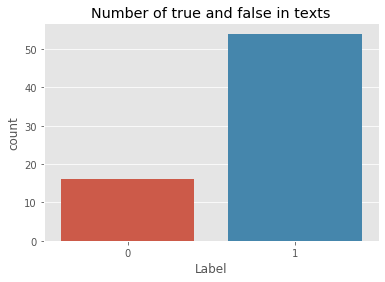

In [198]:
sns.countplot(all_data.outcome)
plt.xlabel('Label')
plt.title('Number of true and false in texts')

In [199]:
all_data.dtypes

outcome     int64
data       object
dtype: object

In [200]:
all_data.data = all_data.data.astype(str)
all_data.outcome = all_data.outcome.astype(int)
all_data.dtypes

outcome     int64
data       object
dtype: object

In [201]:
all_data['data'].astype(str).str.split('.').str[0:]

0     [   China Expands Foreign Cooperation in Onsho...
1     [   Sampras, Chang advance to Salem Open final...
2     [   NATO archives show Pope Ratzinger is Jacki...
3     [   G7 meeting seen as "dollar's last hope" \n...
4     [   Chinese telecommunications company issues ...
                            ...                        
65    [   UK Scientists Call for Wildlife Health Mon...
66    [   A threat to shell a Canadian peacekeeping ...
67    [   Chissano Urges Churches to Step up Dialog ...
68    [   NZ Government Signs Land Deal with Maoris ...
69    [   Facts and Figures: China's Imports from Ru...
Name: data, Length: 70, dtype: object

In [202]:
all_data.data = all_data.data.str.replace('\n',' ')
all_data.data = all_data.data.str.replace('[^\w\s]',' ')
all_data.data = all_data.data.str.replace('_',' ')
all_data.data = all_data.data.str.replace('\n',' ')
all_data.data = all_data.data.str.lower()

all_data.loc[0,'data']

'   china expands foreign cooperation in onshore oil production      china is actively exploring international oil markets  alongside    efforts to tap huge oil and gas resources domestically  by inviting    foreign partners  according to a senior chinese oil official      president wang tao of the china national petroleum corp  cnpc  said in    an interview with xinhua today that china has expanded sino foreign    onshore oil cooperation to 21 provinces and autonomous regions     covering a total area of nearly 2 5 million sq km      so far  china has signed 34 contracts worth 627 million us dollars with    32 foreign oil giants in terms of oil and gas risk exploration and    technical services      china  meanwhile  has developed a cumulative crude oil and gas    production capacity of 40 5 million tons and 500 million cu m by taking    advantage of various foreign supplied loans totalling 9 94 billion us    dollars      the senior oil official added that china is also making headway

In [217]:
X = all_data.data
Y = all_data.outcome
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [218]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.5)

In [219]:
max_words = 1000
max_len = 150

tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [220]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [221]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])
accr = model.evaluate(test_sequences_matrix,Y_test)
print('Loss : ',accr[0])
print('Accuracy : ',accr[1])

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_11 (Embedding)     (None, 150, 50)           50000     
_________________________________________________________________
lstm_11 (LSTM)               (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_19 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257

/u/erdos/mamin17/.local/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 28 samples, validate on 7 samples
Epoch 1/10
28/28 [==============================] - 1s 43ms/step - loss: 0.6928 - accuracy: 0.5714 - val_loss: 0.6797 - val_accuracy: 1.0000
Epoch 2/10
28/28 [==============================] - 0s 13ms/step - loss: 0.6860 - accuracy: 0.6786 - val_loss: 0.6632 - val_accuracy: 1.0000
Epoch 3/10
28/28 [==============================] - 0s 9ms/step - loss: 0.6771 - accuracy: 0.6786 - val_loss: 0.6387 - val_accuracy: 1.0000
Epoch 4/10
28/28 [==============================] - 0s 9ms/step - loss: 0.6649 - accuracy: 0.6786 - val_loss: 0.6154 - val_accuracy: 1.0000
Epoch 5/10
28/28 [==============================] - 0s 11ms/step - loss: 0.6444 - accuracy: 0.6786 - val_loss: 0.5469 - val_accuracy: 1.0000
Epoch 6/10
28/28 [==============================] - 0s 11ms/step - loss: 0.5947 - accuracy: 0.6786 - val_loss: 0.2577 - val_accuracy: 1.0000
Epoch 7/10
35/35 [==============================] - 0s 2ms/step
Loss :  0.5625343654836927
Accuracy :  0.77142858